In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
train_path = pd.read_csv(r'house-prices-advanced-regression-techniques\train.csv')
test_path = pd.read_csv(r'house-prices-advanced-regression-techniques\test.csv')

In [3]:
train_path.shape, test_path.shape

((1460, 81), (1459, 80))

In [4]:
train_path.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
import pandas as pd

# Load the dataset
train_path = r"house-prices-advanced-regression-techniques\train.csv"
df_train = pd.read_csv(train_path)

# Calculate the percentage of missing values in each column
missing_percentage = df_train.isnull().mean() * 100

# Display missing values percentage for all columns
missing_percentage = missing_percentage[missing_percentage > 0]  # Show only columns with missing values
missing_percentage = missing_percentage.sort_values(ascending=False)  # Sort in descending order

# Print the missing values percentage
print("Missing Values Percentage:\n")
print(missing_percentage)

# Drop columns where more than 75% of values are missing
columns_to_drop = missing_percentage[missing_percentage > 75].index
df_train = df_train.drop(columns=columns_to_drop)

# Remove rows with any NaN values
df_train = df_train.dropna(axis=1)
                          
# Print the remaining columns and the number of rows after dropping NaN values
print("\nColumns remaining after dropping high-missing-value columns:\n")
print(df_train.columns)

print("\nNumber of rows remaining after removing rows with any NaN values:", df_train.shape[0])

Missing Values Percentage:

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

Columns remaining after dropping high-missing-value columns:

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', '

In [6]:
df_train.shape

(1460, 62)

In [7]:
df_train.isnull().sum().sort_values(ascending=False)

Id              0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
               ..
Foundation      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
SalePrice       0
Length: 62, dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Define numerical imputer (using mean)
numerical_imputer = SimpleImputer(strategy='mean')

# Define categorical imputer (using mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Create a column transformer to apply the appropriate imputer to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),    # Apply numerical imputer to numerical columns
        ('cat', categorical_imputer, categorical_cols)  # Apply categorical imputer to categorical columns
    ])

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the pipeline to impute missing values
df_imputed = pipeline.fit_transform(df_train)

In [9]:
# Convert the result back into a DataFrame with the original column names
df_imputed = pd.DataFrame(df_imputed, columns=df_train.columns)

# Check for missing values after imputation
missing_values_after_imputation = df_imputed.isnull().sum()

# Print the sum of missing values for each column
print("\nMissing Values After Imputation:\n")
print(missing_values_after_imputation)


Missing Values After Imputation:

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64


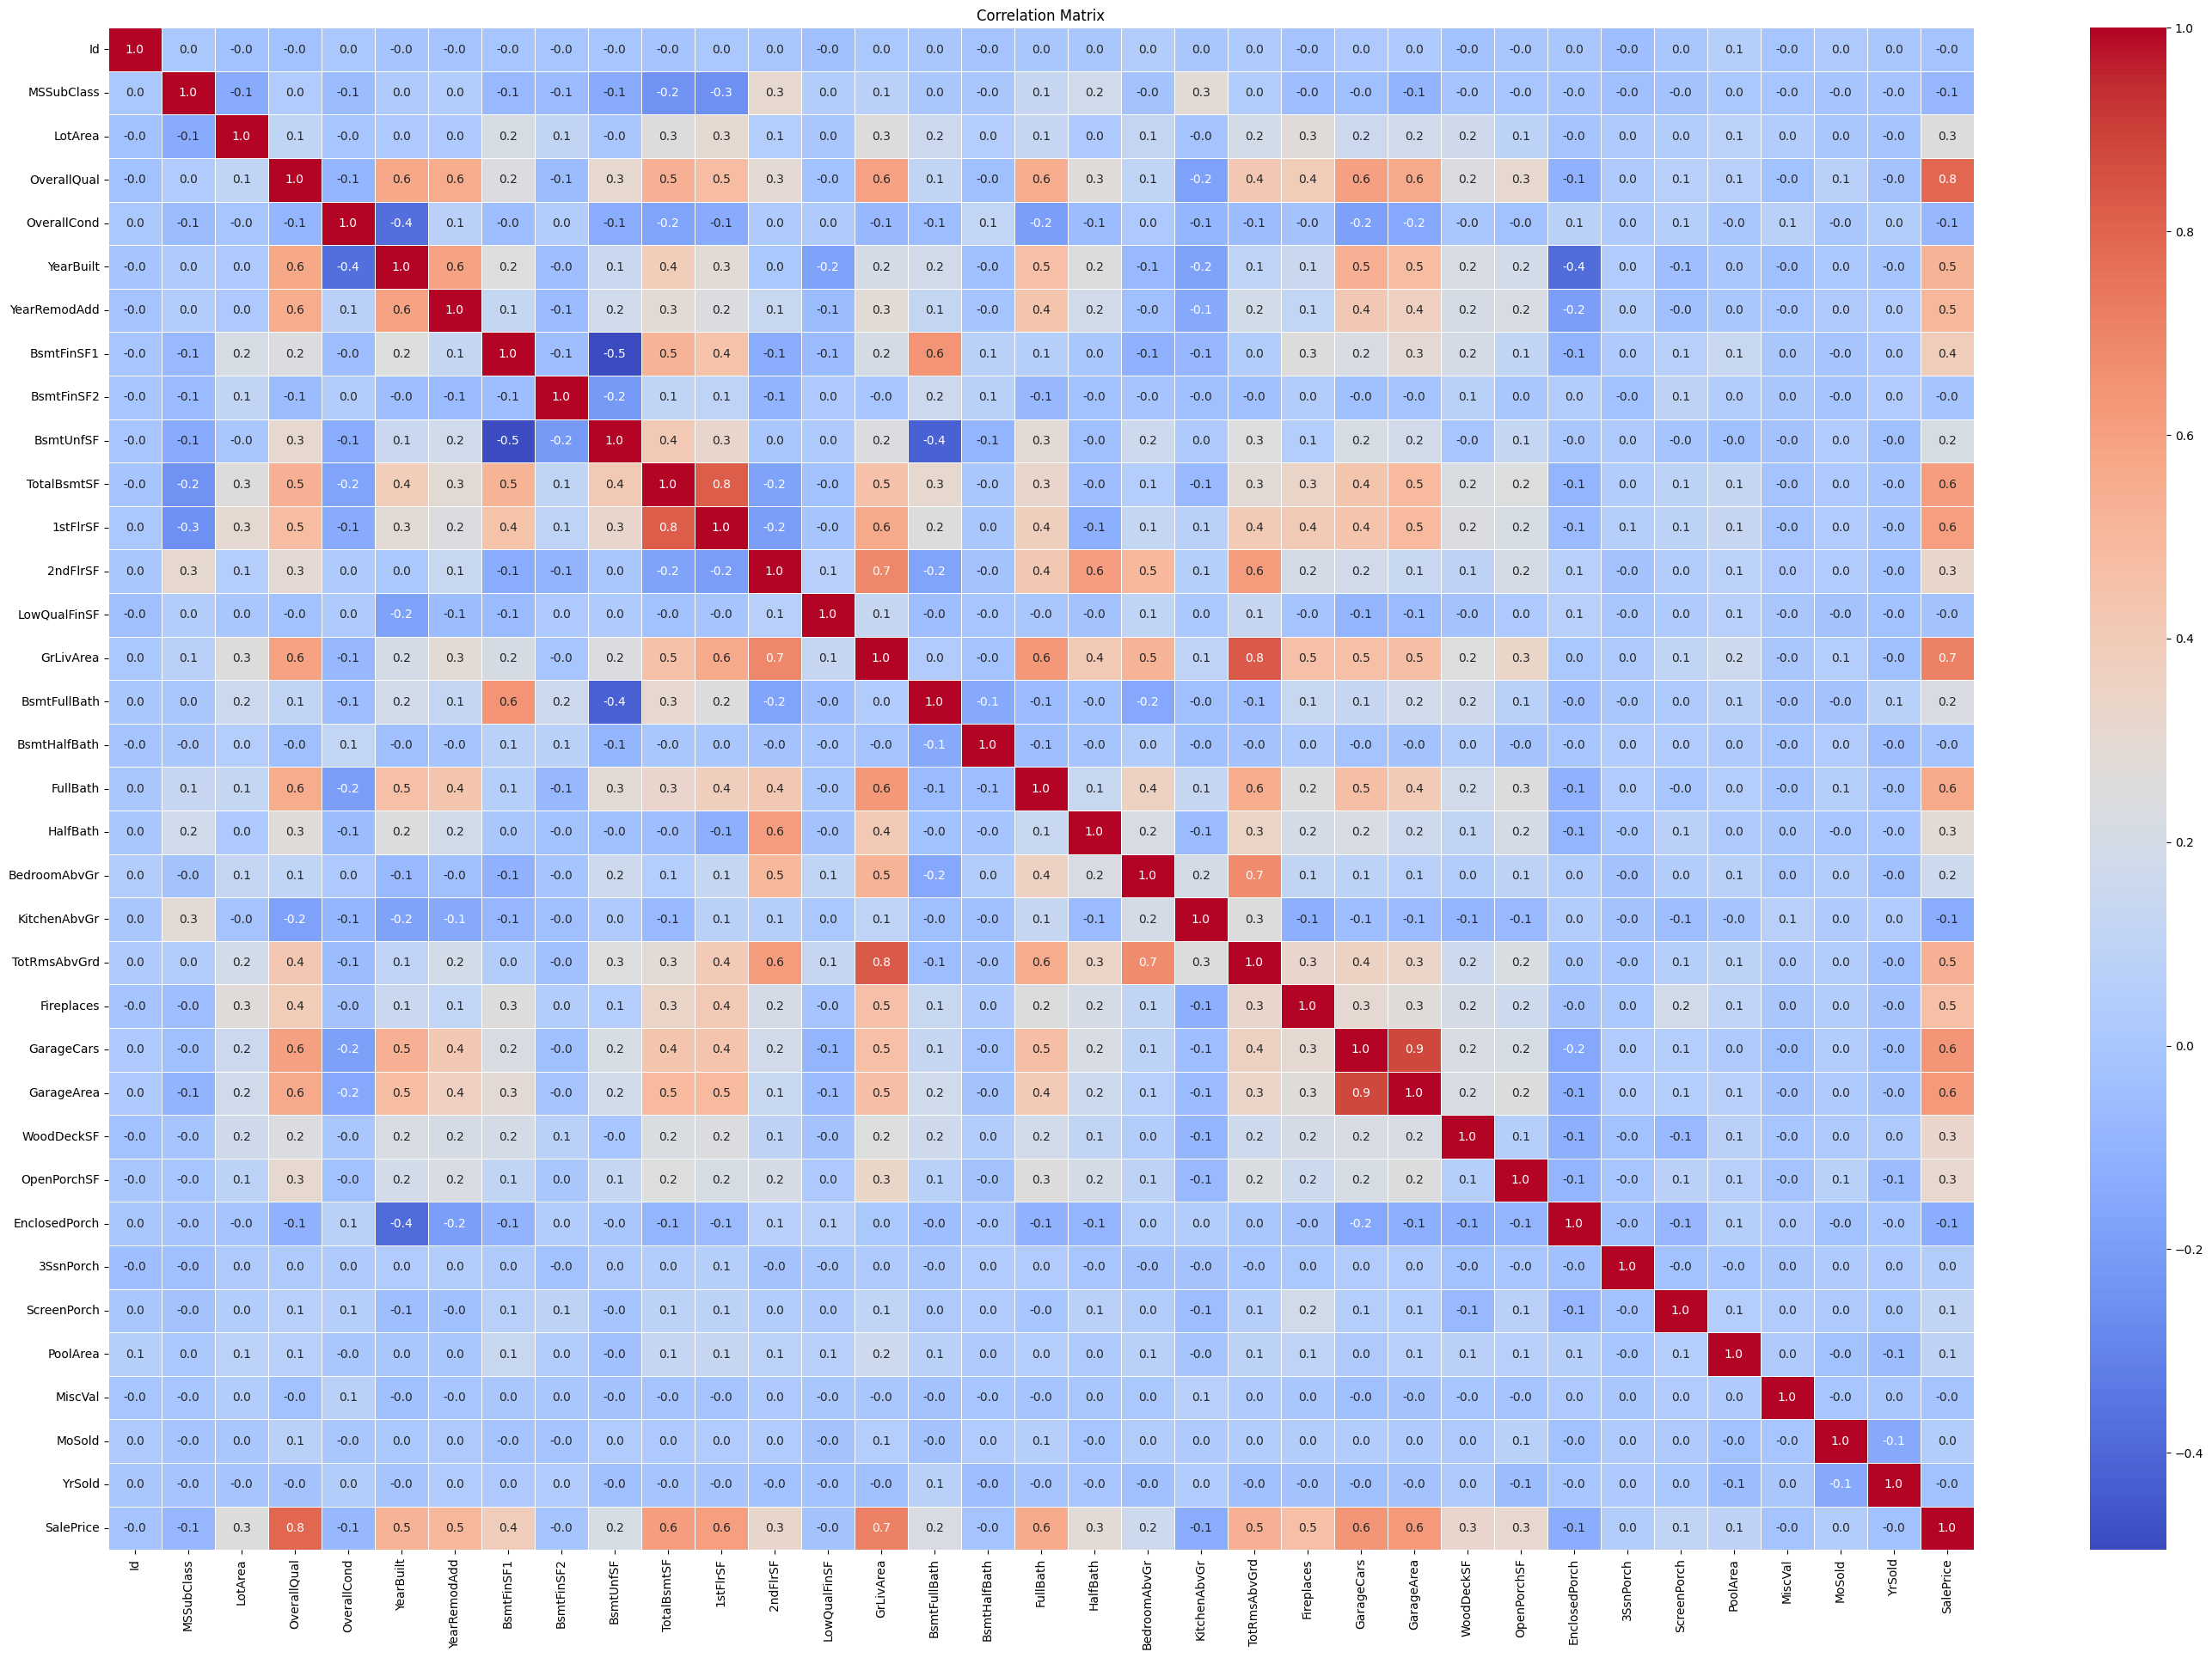

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_df = df_train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for all numerical columns
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(35, 23))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [11]:
import numpy as np

# Calculate the correlation matrix and take absolute values to make correlations positive
correlation_matrix = numerical_df.corr().abs()

# Set diagonal to 0 to avoid comparing a variable with itself
np.fill_diagonal(correlation_matrix.values, 0)

# Find pairs of variables with correlation greater than 0.8
highly_correlated_pairs = np.where(correlation_matrix > 0.8)

# List to track variables to remove
variables_to_remove = []

# Iterate through pairs of highly correlated variables
for i, j in zip(*highly_correlated_pairs):
    var1 = correlation_matrix.columns[i]
    var2 = correlation_matrix.columns[j]
    
    # If we haven't already marked these variables for removal, compare their variances
    if var1 != var2:
        # Check if the variable has already been marked for removal
        if var1 not in variables_to_remove and var2 not in variables_to_remove:
            # Compute variances for both variables
            var1_variance = numerical_df[var1].var()
            var2_variance = numerical_df[var2].var()
            
            # Keep the one with the highest variance
            if var1_variance > var2_variance:
                variables_to_remove.append(var2)  # Remove the one with lower variance
            else:
                variables_to_remove.append(var1)  # Remove the one with lower variance

# Drop the variables that were marked for removal
df_train_reduced = df_train.drop(columns=variables_to_remove)

# Show the reduced DataFrame
print("\nVariables removed due to high correlation:", variables_to_remove)
print("\nRemaining columns after removing correlated variables with low variance:", df_train_reduced.columns)


Variables removed due to high correlation: ['1stFlrSF', 'TotRmsAbvGrd', 'GarageCars']

Remaining columns after removing correlated variables with low variance: Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleTyp

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
# 4. Normalize/Scale Numerical Features
numerical_cols = df_train_reduced.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

In [14]:
# 5. Encode Categorical Variables
categorical_cols = df_train_reduced.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore')

In [15]:
# 7. Remove Duplicate Rows
df_train_cleaned = df_train_reduced.drop_duplicates()

In [16]:
df_train_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

#### For Data Test

In [17]:
import pandas as pd

# Load the dataset
test_path = r"house-prices-advanced-regression-techniques\test.csv"
df_test = pd.read_csv(test_path)

# Calculate the percentage of missing values in each column
missing_percentage = df_test.isnull().mean() * 100

# Display missing values percentage for all columns
missing_percentage = missing_percentage[missing_percentage > 0]  # Show only columns with missing values
missing_percentage = missing_percentage.sort_values(ascending=False)  # Sort in descending order

# Print the missing values percentage
print("Missing Values Percentage:\n")
print(missing_percentage)

# Drop columns where more than 75% of values are missing
columns_to_drop = missing_percentage[missing_percentage > 75].index
df_test = df_test.drop(columns=columns_to_drop)

# Remove rows with any NaN values
df_test = df_test.dropna(axis=1)
                          
# Print the remaining columns and the number of rows after dropping NaN values
print("\nColumns remaining after dropping high-missing-value columns:\n")
print(df_test.columns)

print("\nNumber of rows remaining after removing rows with any NaN values:", df_test.shape[0])

Missing Values Percentage:

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64

Columns remaining after dropping high-missing-value columns:

Index(['Id', 'MSSubClass', 'LotArea'

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate numerical and categorical columns
numerical_cols = df_test.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_test.select_dtypes(include=['object']).columns

# Define numerical imputer (using mean)
numerical_imputer = SimpleImputer(strategy='mean')

# Define categorical imputer (using mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Create a column transformer to apply the appropriate imputer to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),    # Apply numerical imputer to numerical columns
        ('cat', categorical_imputer, categorical_cols)  # Apply categorical imputer to categorical columns
    ])

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the pipeline to impute missing values
df_imputed_test = pipeline.fit_transform(df_test)

In [19]:
# Convert the result back into a DataFrame with the original column names
df_imputed_test = pd.DataFrame(df_imputed_test, columns=df_test.columns)

# Check for missing values after imputation
missing_values_after_imputation = df_imputed_test.isnull().sum()

# Print the sum of missing values for each column
print("\nMissing Values After Imputation:\n")
print(missing_values_after_imputation)


Missing Values After Imputation:

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
dtype: int64


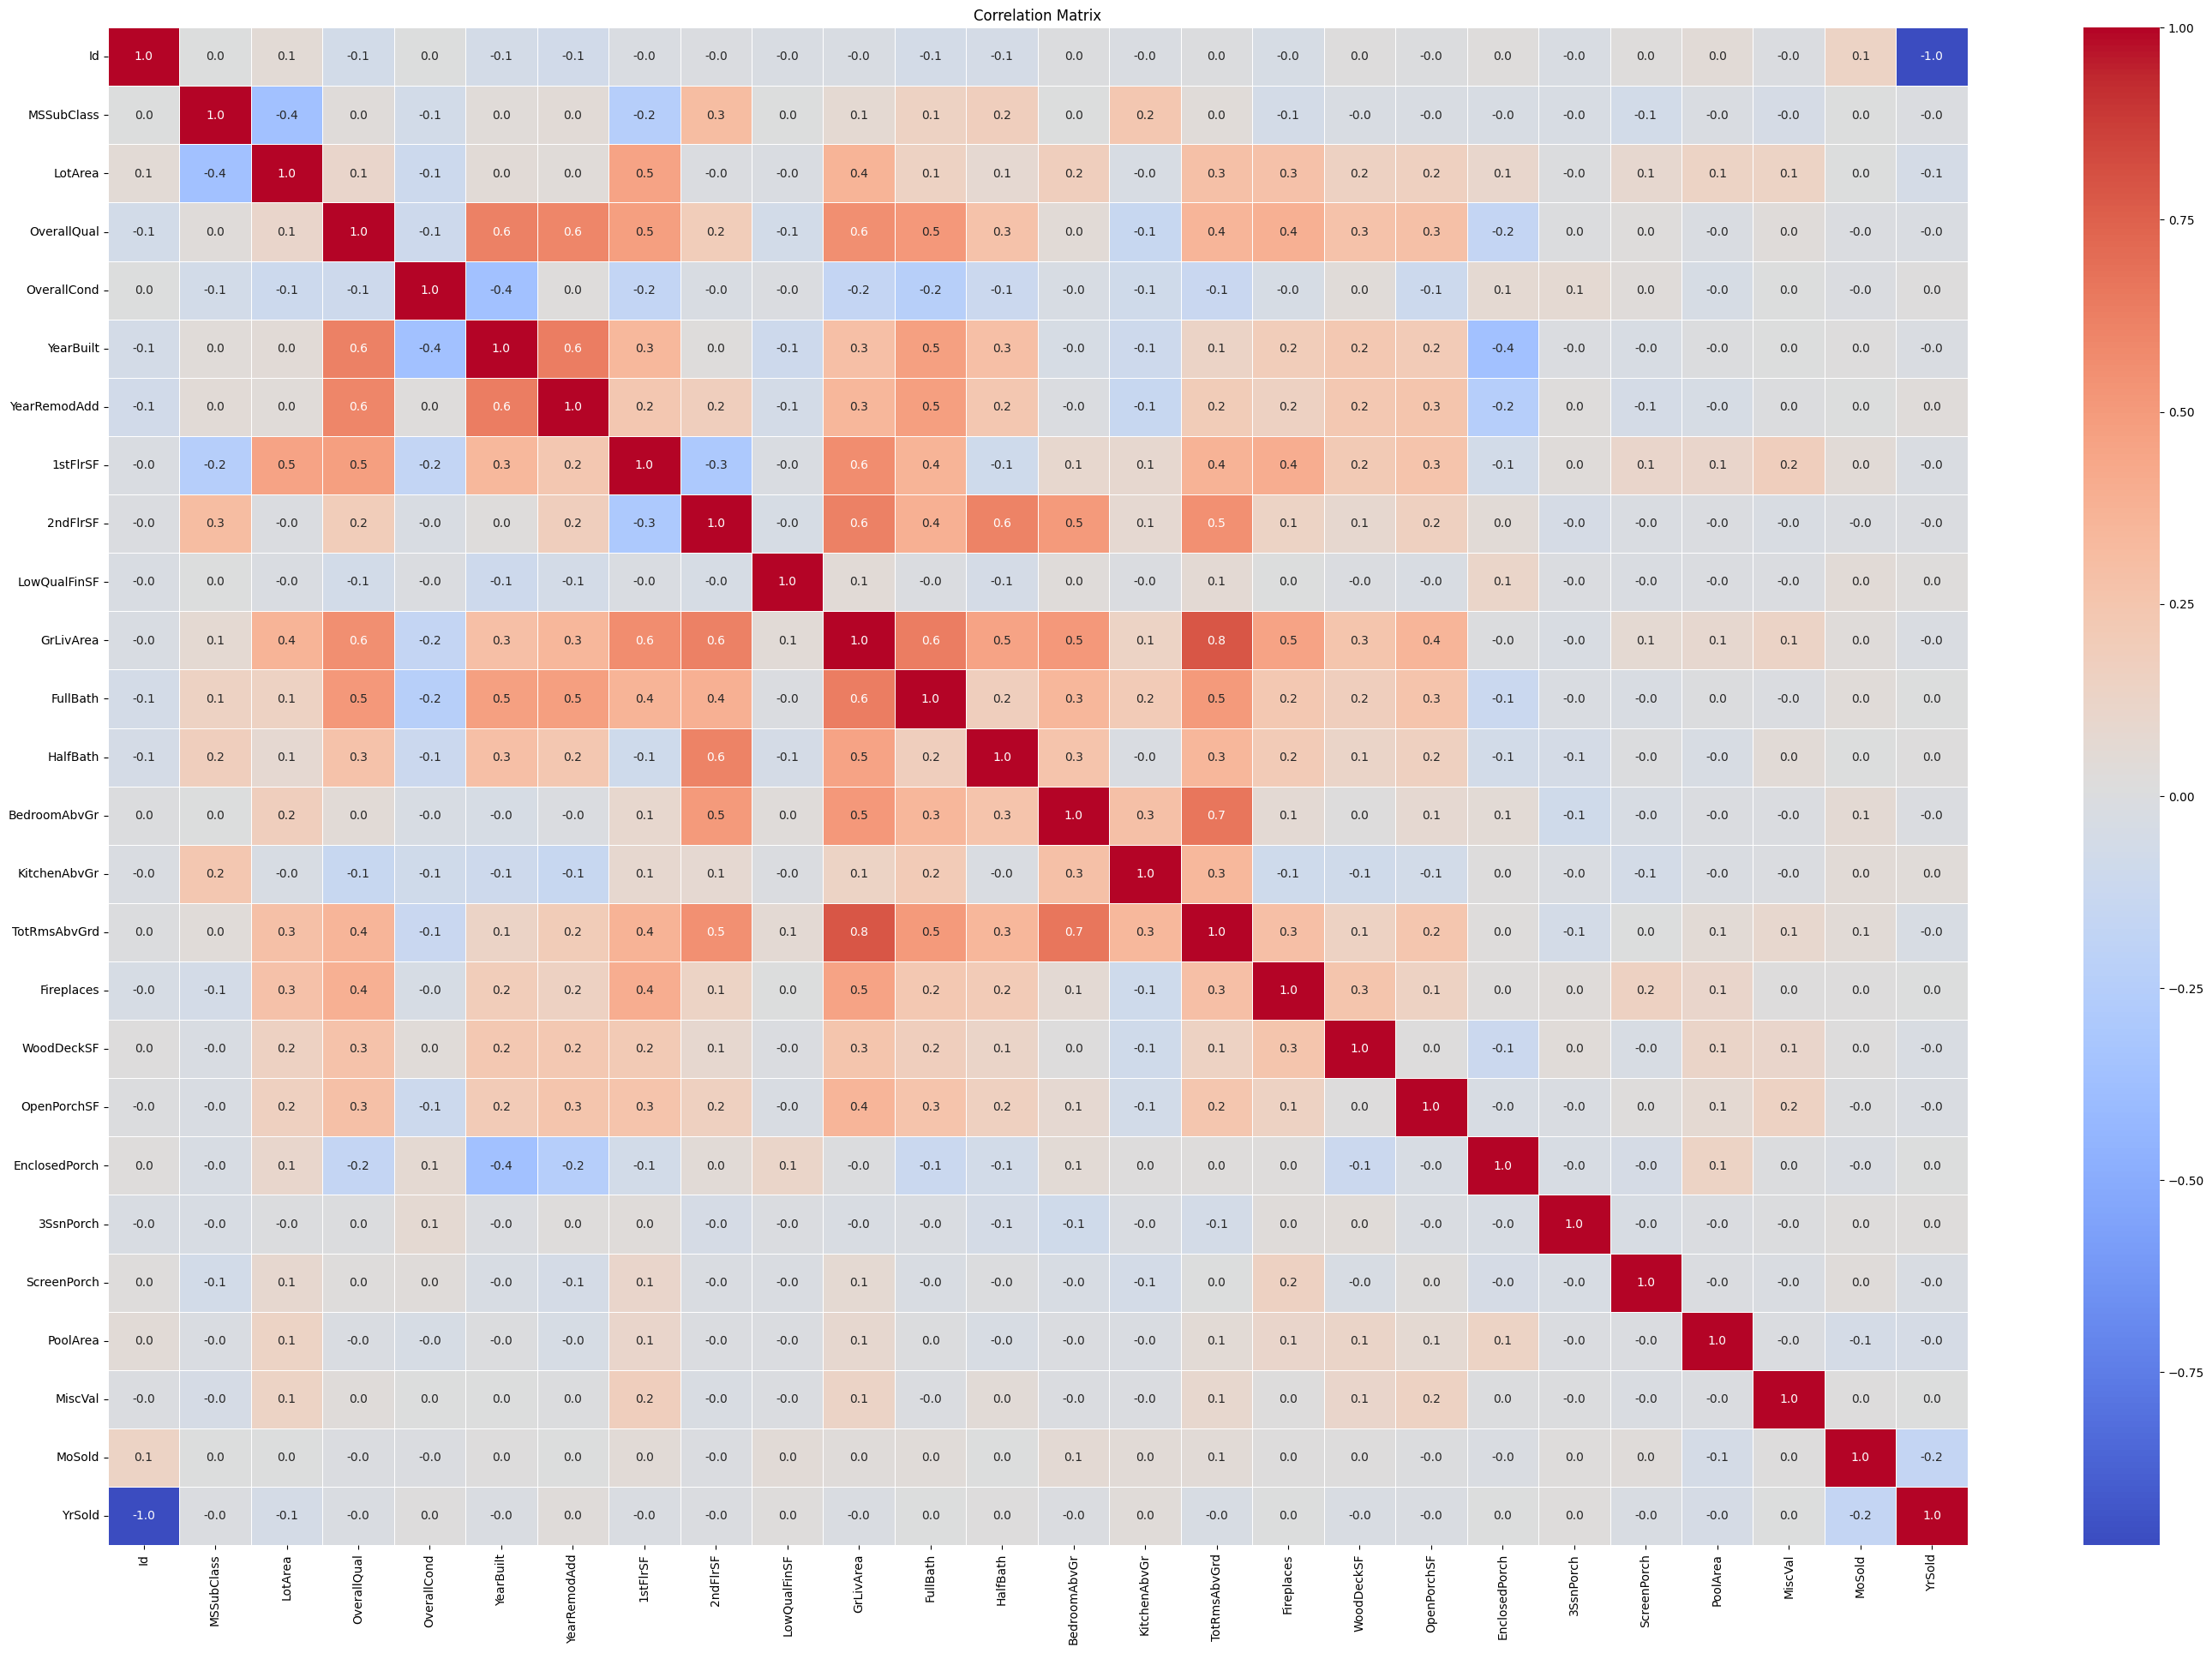

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_df = df_test.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for all numerical columns
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(35, 23))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [21]:
import numpy as np

# Calculate the correlation matrix and take absolute values to make correlations positive
correlation_matrix = numerical_df.corr().abs()

# Set diagonal to 0 to avoid comparing a variable with itself
np.fill_diagonal(correlation_matrix.values, 0)

# Find pairs of variables with correlation greater than 0.8
highly_correlated_pairs = np.where(correlation_matrix > 0.8)

# List to track variables to remove
variables_to_remove = []

# Iterate through pairs of highly correlated variables
for i, j in zip(*highly_correlated_pairs):
    var1 = correlation_matrix.columns[i]
    var2 = correlation_matrix.columns[j]
    
    # If we haven't already marked these variables for removal, compare their variances
    if var1 != var2:
        # Check if the variable has already been marked for removal
        if var1 not in variables_to_remove and var2 not in variables_to_remove:
            # Compute variances for both variables
            var1_variance = numerical_df[var1].var()
            var2_variance = numerical_df[var2].var()
            
            # Keep the one with the highest variance
            if var1_variance > var2_variance:
                variables_to_remove.append(var2)  # Remove the one with lower variance
            else:
                variables_to_remove.append(var1)  # Remove the one with lower variance

# Drop the variables that were marked for removal
df_test_reduced = df_train.drop(columns=variables_to_remove)

# Show the reduced DataFrame
print("\nVariables removed due to high correlation:", variables_to_remove)
print("\nRemaining columns after removing correlated variables with low variance:", df_test_reduced.columns)


Variables removed due to high correlation: ['YrSold']

Remaining columns after removing correlated variables with low variance: Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', '

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# 4. Normalize/Scale Numerical Features
numerical_cols = df_test_reduced.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
# 5. Encode Categorical Variables
categorical_cols = df_test_reduced.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore')
# 7. Remove Duplicate Rows
df_test_cleaned = df_test_reduced.drop_duplicates()

In [23]:
# Save the cleaned training data
df_train_cleaned.to_csv('data_train_cleaned.csv', index=False)

# Save the cleaned test data
df_test_cleaned.to_csv('data_test_cleaned.csv', index=False)